# YouTube 영상에서 댓글을 추출하고 Word Cloud 만들기

### 필요한 라이브러리 Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from googleapiclient.discovery import build

import re

### YouTube 댓글 추출하여 Excel file로 저장

In [ ]:
import pandas
from googleapiclient.discovery import build
 
api_key = 'api_key'      # 본인의 api_key를 입력
video_id = 'video_id'    # 해당 영상의 video_id를 입력
v_title = "안과의사가 눈영양제 보다 추천하는 이것은 눈 건강 관리는 이렇게"  # Optional
 
comments = list()
api_obj = build('youtube', 'v3', developerKey=api_key)
response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, maxResults=100).execute()
 
while response:
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([comment['textDisplay'], comment['authorDisplayName'], comment['publishedAt'], comment['likeCount']])
 
        if item['snippet']['totalReplyCount'] > 0:
            for reply_item in item['replies']['comments']:
                reply = reply_item['snippet']
                comments.append([reply['textDisplay'], reply['authorDisplayName'], reply['publishedAt'], reply['likeCount']])
 
    if 'nextPageToken' in response:
        response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, pageToken=response['nextPageToken'], maxResults=100).execute()
    else:
        break
 
df = pandas.DataFrame(comments)
df.to_excel(f'results_{v_title}.xlsx', header=['comment', 'author', 'date', 'num_likes'], index=None)

### 저장된 Excel file 불러오기

In [2]:
df = pd.read_excel("./results_안과의사가 눈영양제 보다 추천하는 이것은 눈 건강 관리는 이렇게.xlsx")
df

,comment,author,date,num_likes
0,※ 해당 영상 속 잘못 설명한 부분이 있어 정정합니다.\r<br> 토비콤...,안과의사 김무연,2020-12-28T02:26:50Z,232
1,샘요 그래서 머 먹으면 되는거에요?,文成羽,2022-05-23T11:41:14Z,2
2,좋은말씀고마습니다,이종,2022-05-20T11:32:53Z,0
3,@최원희 ㅡ,귀순 김,2022-01-16T12:45:56Z,1
4,그것만 정정하실게 아니라 아래 내용도 정정하셔야겠습니다. <br><br>아사이베리가...,yuyu,2021-09-26T05:36:26Z,14
...,...,...,...,...
766,안녕하세요 홍스코님. 불편함이 없으시더라도 수술 초기이시라면 눈이 쉽게 피로하고 건...,안과의사 김무연,2020-11-24T04:34:59Z,10
767,선생님 스마일 라식을 하고난뒤에 각막 절개부위는 다시 아무나요??,MiNiSU,2020-11-21T04:10:44Z,18
768,잘보고있어요,I M,2020-11-20T11:33:31Z,9
769,"안과의사 김무연에게 물어봐 : <a href=""https://bit.ly/3adGg...",안과의사 김무연,2020-11-20T09:39:08Z,18


In [3]:
sample = df.comment[4]
sample

'그것만 정정하실게 아니라 아래 내용도 정정하셔야겠습니다. <br><br>아사이베리가 아니라 &quot;아로니아&quot;에 <br>안토시아닌이 가장 많이 함유돼 있습니다. 아사이베리는 포도보다도 함유량이 적습니다.<br><br>100g당 안토시아닌 함유량 다음과 같습니다.<br>( 미 농무부 산하 연구소)<br><br>1. 아로니아: 16,062mg<br>2. 블루베리: 4,669mg<br>3. 포도: 1,837mg<br>4. 아사이베리: 1,027mg<br><br>모두가 볼 수 있는 영상임만큼 객관적 데이터에 근거해 정확한 사실 확인 후 말씀 부탁 드립니다.'

#### 특수문자 제거 함수

In [4]:
def clean_text(text):
    # 정규표현식을 사용하여 특수문자와 영어, 공백을 제거하는 함수
    # return re.sub('[-=+,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》a-zA-Z0-9]', '', text)
    return re.sub(r'[^가-힣\s]+', '', text)

특수문제가 제거된 comment를 새로운 컬럼(`clean`)에 추가한다

In [5]:
df['clean'] = df.comment.apply(clean_text)
df

,comment,author,date,num_likes,clean
0,※ 해당 영상 속 잘못 설명한 부분이 있어 정정합니다.\r<br> 토비콤...,안과의사 김무연,2020-12-28T02:26:50Z,232,해당 영상 속 잘못 설명한 부분이 있어 정정합니다\r 토비콤골드정 토비...
1,샘요 그래서 머 먹으면 되는거에요?,文成羽,2022-05-23T11:41:14Z,2,샘요 그래서 머 먹으면 되는거에요
2,좋은말씀고마습니다,이종,2022-05-20T11:32:53Z,0,좋은말씀고마습니다
3,@최원희 ㅡ,귀순 김,2022-01-16T12:45:56Z,1,최원희
4,그것만 정정하실게 아니라 아래 내용도 정정하셔야겠습니다. <br><br>아사이베리가...,yuyu,2021-09-26T05:36:26Z,14,그것만 정정하실게 아니라 아래 내용도 정정하셔야겠습니다 아사이베리가 아니라 아로니아...
...,...,...,...,...,...
766,안녕하세요 홍스코님. 불편함이 없으시더라도 수술 초기이시라면 눈이 쉽게 피로하고 건...,안과의사 김무연,2020-11-24T04:34:59Z,10,안녕하세요 홍스코님 불편함이 없으시더라도 수술 초기이시라면 눈이 쉽게 피로하고 건조...
767,선생님 스마일 라식을 하고난뒤에 각막 절개부위는 다시 아무나요??,MiNiSU,2020-11-21T04:10:44Z,18,선생님 스마일 라식을 하고난뒤에 각막 절개부위는 다시 아무나요
768,잘보고있어요,I M,2020-11-20T11:33:31Z,9,잘보고있어요
769,"안과의사 김무연에게 물어봐 : <a href=""https://bit.ly/3adGg...",안과의사 김무연,2020-11-20T09:39:08Z,18,안과의사 김무연에게 물어봐 \r눈에 대한 모든 궁금증 더 알아보기 \r안...


In [6]:
sample_out = df.clean[4]
sample_out

'그것만 정정하실게 아니라 아래 내용도 정정하셔야겠습니다 아사이베리가 아니라 아로니아에 안토시아닌이 가장 많이 함유돼 있습니다 아사이베리는 포도보다도 함유량이 적습니다당 안토시아닌 함유량 다음과 같습니다 미 농무부 산하 연구소 아로니아  블루베리  포도  아사이베리 모두가 볼 수 있는 영상임만큼 객관적 데이터에 근거해 정확한 사실 확인 후 말씀 부탁 드립니다'

해당 영상의 댓글 길이 정보 확인

In [7]:
df_length = df['clean'].astype(str).apply(len)

#댓글 통계 정보
print('댓글 길이 최댓값: {}'.format(np.max(df_length)))
print('댓글 길이 최솟값: {}'.format(np.min(df_length)))
print('댓글 길이 평균값: {:.2f}'.format(np.mean(df_length)))
print('댓글 길이 표준편차: {:.2f}'.format(np.std(df_length)))
print('댓글 길이 중간값: {}'.format(np.median(df_length)))
print('댓글 길이 제1사분위: {}'.format(np.percentile(df_length,25)))
print('댓글 길이 제3사분위: {}'.format(np.percentile(df_length,75)))

댓글 길이 최댓값: 803
댓글 길이 최솟값: 0
댓글 길이 평균값: 44.67
댓글 길이 표준편차: 64.40
댓글 길이 중간값: 27.0
댓글 길이 제1사분위: 13.0
댓글 길이 제3사분위: 49.0


### Word Cloud

In [8]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in df['clean'] if type(review) is str]
train_review

['  해당 영상 속 잘못 설명한 부분이 있어 정정합니다\r      토비콤골드정 토비콤에스연질캡슐  일반의약품\r      박카스  박카스  의약외품',
 '샘요 그래서 머 먹으면 되는거에요',
 '좋은말씀고마습니다',
 '최원희 ',
 '그것만 정정하실게 아니라 아래 내용도 정정하셔야겠습니다 아사이베리가 아니라 아로니아에 안토시아닌이 가장 많이 함유돼 있습니다 아사이베리는 포도보다도 함유량이 적습니다당 안토시아닌 함유량 다음과 같습니다 미 농무부 산하 연구소 아로니아  블루베리  포도  아사이베리 모두가 볼 수 있는 영상임만큼 객관적 데이터에 근거해 정확한 사실 확인 후 말씀 부탁 드립니다',
 '감사합니다',
 '한미약품  안토시안 조아요 친구에게 추천해서 고맙다는 소리 들어서요  참고하세요',
 '저희가족은 다먹고 있어요',
 '요즘 일 하면서 눈이 많이 피로하고 컴퓨터를 많이 보는 직업으로서 눈 건강에 대해 관심이 생겼어요 영양제가 지금 저에게 있어서 필수인 줄 알았는데 먹어도 안 먹어도 비슷비슷하다고 하니 제가 좀 더 일상생활에서 관리해주는 게 더욱 중요할 거 같아요',
 '선생님  좋은 정보 감사합니다',
 '정보 감사합니다',
 '눈맛사지는 어떤가요  온열기능과 지압기능도 있던데   하루 두세번 사용하면 효과가 있을까요',
 '감사합니다비싼 지아잔틴루테인 먹지말고 아사히베리 먹을까봐요',
 '눈이 나빠 눈 건강에 항상 신경쓰는데 이렇게 도움이 되는 정보를 얻을수 있게 되어서 너무 좋아요전문적인 지식을 가지고 건강관리에 임해야하는데 소문이나 사람들 입소문등에 많이 의지하는것도 고쳐야겠네요 유익한 정보 감사합니다',
 '좋은정보감사드립니다',
 '노안 수술한지 개월  됐는데요안과여려곳을 가봐도 사진상 질환이 없다고 하는데 충혈이 돼서 핏줄이 터지고 항상 눈이 빡빡한 느낌이 항상있어요  눈두덩이가 붓고  인공눈물을 달고사는데 운동을 걷기만해도  충혈이 심해요  병원을 가도 통쾌한 답변이 없어요고민입니다',
 '감사합니다',
 '과학적 의학적에 기반해서

In [9]:
# 1. 필요한 모듈 불러오기
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from matplotlib import rc
import pandas as pd 
import urllib.request
# %matplotlib inline

In [ ]:
# 한글 폰트 준비
urllib.request.urlretrieve("http://macsplex.com/?module=file&act=procFileDownload&file_srl=2851&sid=ea4a36b12467c4446c21e70762c7d10f&module_srl=2822g", filename="AppleGothic.ttf")

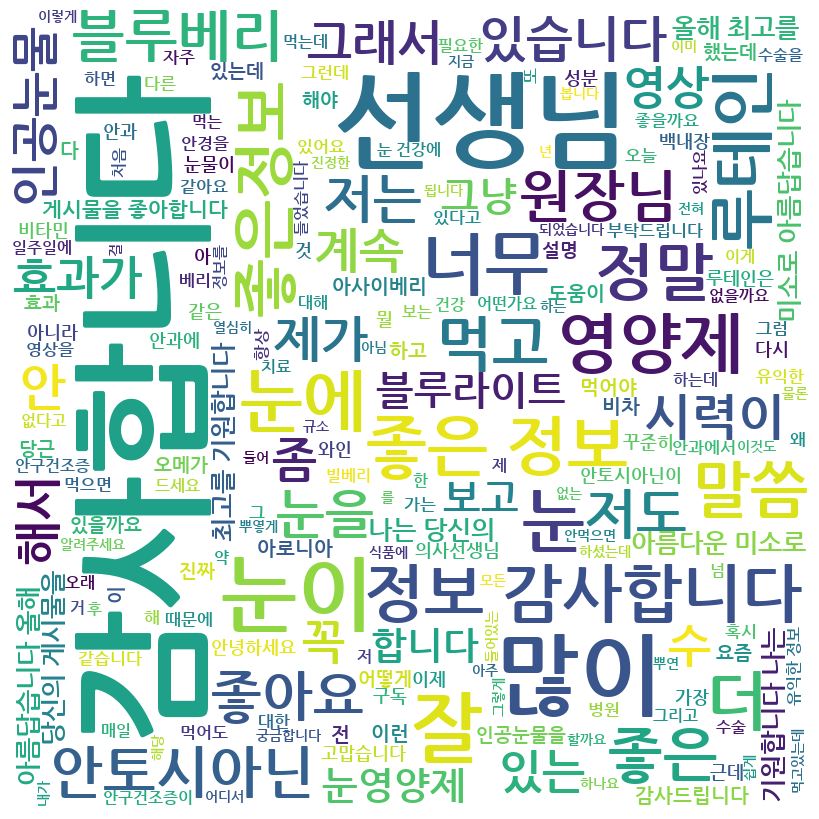

In [10]:
# 2. Stopwords 및 특수문자 필터링을 위한 준비

comment_words = ''
stopwords = set(STOPWORDS)

tokenized_text = []

# 3. 문장 데이터를 단어화하기
for val in df["clean"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()

  tokenized_text.append(tokens)
  comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(width = 800, height = 800, 
                font_path='AppleGothic.ttf',
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### 불용어 정의

In [11]:
# 필터링할 추가적인 stopwords들 정의

stopwords_2 = ['이', '있', '하', '것', '들', '그', '되', '수', '보', '않', '없', '나', '사람', '주', '아니', 
               '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '은', '는',
               '이렇게', '더', '수', '다', '그', '내가', '저는', '완전', '봤는데', '왜', '이런', '본', '잘', '저' ,'좀', '안', '선생님', 
               '그냥', '안녕하세요','혹시', '많이', '너무', '계속', '에', '정말', '있는데', '그래서', '이거', '제가', '진짜', '그리고', '보면', 
               '근데', '저도', '어떻게', '있어요', '가서', '있나요', '하고', '같습니다', '해서', '보이는데', '그런', '했는데', '지금은', '전', 
               '있는', '합니다', '게시물을 좋아합니다', '그런데', '같은', '당신의 게시물을', '말씀', '기원합니다', '있다고', '않고', 
               '나는', '당신의', '미소로 아름답습니다', '하셨는데', '하네요', '있다고', '하나요', '주시면', '해', '있고',               
               ]

In [12]:
# 토큰화된 문장확인
print(tokenized_text[4])
print()
print(len(tokenized_text))

['그것만', '정정하실게', '아니라', '아래', '내용도', '정정하셔야겠습니다', '아사이베리가', '아니라', '아로니아에', '안토시아닌이', '가장', '많이', '함유돼', '있습니다', '아사이베리는', '포도보다도', '함유량이', '적습니다당', '안토시아닌', '함유량', '다음과', '같습니다', '미', '농무부', '산하', '연구소', '아로니아', '블루베리', '포도', '아사이베리', '모두가', '볼', '수', '있는', '영상임만큼', '객관적', '데이터에', '근거해', '정확한', '사실', '확인', '후', '말씀', '부탁', '드립니다']

771


In [13]:
# 새로운 불용어와 기존 불용어 필터링하기

def filter_stopwords(tokenized_text, stopwords_2):
  tokenized_filtered = []

  for i in tokenized_text:
    for word in i:
      if word not in stopwords and word not in stopwords_2:
        tokenized_filtered.append(word)
        
  return tokenized_filtered

In [14]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

In [15]:
# 필터링 되었는지 확인
tokenized_filtered[0:10]

['해당', '영상', '속', '잘못', '설명한', '부분이', '있어', '정정합니다', '토비콤골드정', '토비콤에스연질캡슐']

In [16]:
len(tokenized_filtered)

6519

### 단어별 빈도 수 확인

In [17]:
# 각 단어가 얼마나 나왔는지 카운트해보기

import operator

def word_count(tokenized_data):
  word_counter = {}

  for i in tokenized_data:
    if i in word_counter.keys():
      word_counter[i] += 1
    else:
      word_counter[i] = 1

  # 많이 나온 순서대로 정렬

  sorted_dict = dict( sorted(word_counter.items(),
                           key=operator.itemgetter(1), reverse=True))
  
  return sorted_dict

In [18]:
tokenized_dict = word_count(tokenized_filtered)

In [19]:
# 가장 많이 나온 상위 30개의 단어 보기
def top_30(tokenized_dict):
  top_30_words = list(tokenized_dict.items())[:30]
  return top_30_words

top_30(tokenized_dict)

[('감사합니다', 158),
 ('좋은', 40),
 ('정보', 38),
 ('눈이', 37),
 ('눈', 29),
 ('눈에', 24),
 ('영양제', 23),
 ('루테인', 22),
 ('좋은정보', 21),
 ('먹고', 19),
 ('안토시아닌', 17),
 ('블루베리', 17),
 ('원장님', 17),
 ('좋아요', 16),
 ('눈을', 15),
 ('있습니다', 14),
 ('시력이', 14),
 ('인공눈물', 13),
 ('영상', 12),
 ('효과가', 12),
 ('도움이', 12),
 ('꼭', 12),
 ('유익한', 11),
 ('올해', 11),
 ('블루라이트', 11),
 ('보고', 11),
 ('눈영양제', 10),
 ('아름다운', 10),
 ('미소로', 10),
 ('아름답습니다', 10)]

단어의 빈도수를 확인하고 추가할 불용어를 선정한다.

#### 불용어 추가

In [20]:
stopwords_2.extend(['좋은', '먹고', '있습니다', '보고', '아름답습니다', '게시물을', '좋아합니다', '갑니다', '비차', '있을까요', '해야', '아니라', '가장', '이제',
                     '아', '뭘', '다시', '구독', '먹으면', '먹어도', '같아요', '때문에', '가는', '부탁드립니다', '또', '하면', '좋을까요', '영상을', '대한', 
                     '그럼', '자주', '많은', '오늘', '후', '보는', '대해', '거', '어떤가요', '없다고', '하는데', '주셔서', '넘', '들었습니다', '먹는', '제',
                     '먹는데', '누르고', '드세요', '이게', '없을까요', '해당', '지금', '진정한', '알려주세요', '안먹으면', '물론', '없는', '들어', '이것도', '아님', 
                     '들어있는', '줄', '걸', '아주', '먹고있는데', '할까요', '를', '됩니다', '모든', '되었습니다', '그렇게', '하는', '봅니다', '알', '이건', '없이', 
                     '만', '방위비', '탈세', '보다', '아니면', '속', '있어', '드립니다', '있어서', '있게', '가지고', '개월', '듯', '나서', '것들을', '참', '별', 
                     '될', '수도', '말씀을', '겁니다', '그래도', '보니', '이걸', '감고', '주고', '있다는', '안에', '뭔가', '많아요', '아무', '했습니다', '쇠뜨기', 
                     '해주셔서', '보이고', '할', 
])

In [21]:
tokenized_filtered = filter_stopwords(tokenized_text, stopwords_2)

len(tokenized_filtered)

5930

In [22]:
tokenized_dict = word_count(tokenized_filtered)

In [23]:
top_30(tokenized_dict)

[('감사합니다', 158),
 ('정보', 38),
 ('눈이', 37),
 ('눈', 29),
 ('눈에', 24),
 ('영양제', 23),
 ('루테인', 22),
 ('좋은정보', 21),
 ('안토시아닌', 17),
 ('블루베리', 17),
 ('원장님', 17),
 ('좋아요', 16),
 ('눈을', 15),
 ('시력이', 14),
 ('인공눈물', 13),
 ('영상', 12),
 ('효과가', 12),
 ('도움이', 12),
 ('꼭', 12),
 ('유익한', 11),
 ('올해', 11),
 ('블루라이트', 11),
 ('눈영양제', 10),
 ('아름다운', 10),
 ('미소로', 10),
 ('최고를', 10),
 ('아로니아', 9),
 ('아사이베리', 9),
 ('먹어야', 9),
 ('감사드립니다', 9)]

### 추가 불용어가 반영된 Word Cloud 결과

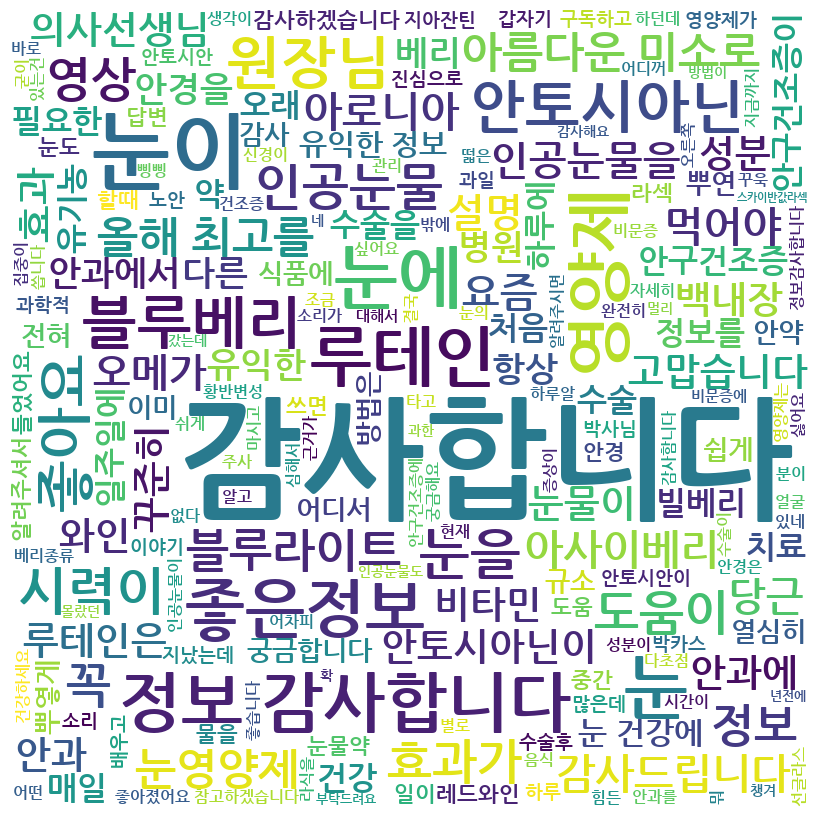

In [24]:
wordcloud = WordCloud(width = 800, height = 800, 
                font_path='AppleGothic.ttf',
                background_color ='white', 
                stopwords =  stopwords_2, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 